# Simulação de acúmulo de sujeira nos cantos do comodo
## Durante aquela faxina de final de semana, daquela que é feita mais por não poder sair de casa durante a quarentena do que propriamente por asseio, é difícil não se irritar (ou se questionar) sobre o excesso de sujeira que fica acumulada nos cantos dos cômodos. No banheiro, nem se fala.

## Isso talvez te leve ao questionamento (ou talvez simplesmente de tire o resto de paciência, faça você desistir da faxina e vá fazer outra coisa menos produtiva com o seu tempo, como escrever esse artigo, por exemplo) do porquê isso acontece. Será que existem Forças Ocultas dos Cantos que passam os dias usando seus poderes maléficos para dificultar ao máximo a sua tentativa de levar uma vida mais limpa e saudável?

## Esse questionamento pode parecer exagerado, mas durante muito tempo essa questão tirou o meu sono (literalmente, principalmente durante as provas de fenômeno de transporte 3 na faculdade). Bom, não exatamente essa questão, mas muitas relacionadas á difusão e passeios aleatórios.

## Difusão é um fenômeno que pra mim pareceu bizarro por muito tempo: como que diábos a batata dentro do arroz absorve o excesso de sal dentro da panela sem que haja uma força dentro da batata sugando esse sal?

## Essa questão, no meu ponto de vista é extremamente profunda e filosófica, e mostra muito dos nossos viéses cognitivos como humanos e seres de narrativa.

## Em narrativas em geral, ações são originiadas por agentes com intenções. Nos famosos contos de Arthur Connan Doyle, em que nosso héroi Sherlock Holmes consegue desvendar até aquilo que parece ser sobrenatural e inexplicável, a ação e intenção de agentes da narrativa sempre deixam traços, perceptíveis apenas para nosso héroi, que de forma determinística conclui com maestria o mistério, apresentando ao leitor a narrativa completa que descreve meticulosamente a ação dos agentes envolvidos no crime e suas intenções.

## Como bem pontuou Yuval Harari diversas vezes em suas obras, a natureza não funciona como uma narrativa (ainda que muitas vezes não consigamos escapar das narrativas para fazer sentido do mundo). O problema da sujeira nas quinas, da batata no arroz e dos dessalinzadores de água do Kwait (poderia citar muitos outros) foram por muito tempo  instâncias desse "viés da narrativa" na minha vida.

## Bem, vamos então desvendar esse mistério! A diferença é que ap invés de usarmos o método de redução analítica do nosso herói Sherlock, vamos usar um um pouco diferente, muito defendido por um grande expoente da Matemática e Computação do século XXI, conhecido também como o grande salvador dos estudantes de cálculo desesperados: Wolfram (O alpha). Wolfram propõe em seu livro "a new kind o science", a simulação como forma de tentar descrever fenômenos complexos. Fenômenos complexos é uma definição para fenômenos em que há uma grande interação entre agentes/forças, com efeitos aleatórios e determinísticos misturados -algo muito mais parecido com nossa vida real-. Uma forma muito comum de simulação é uma chamada Simulação Baseada em Agentes (Agent Based Modeling em ingles).


## A Ideia então é, ao invés de buscar uma lei universal que rege a atração da poeira pelos cantos dos cômodos, vamos definir o comportamento total do sistema definindo o comportamento individual de suas partes e colocá-las para interagir com o ambiente em que se encontram e com seus pares.

## Uma premissa filosófica bastante importante para nossa simulação será também a Navalha de oakan, extremamente importante na filosofia da ciência, que diz que: se dois modelos explicam igualmente bem a realidade, devemos escolher aquele que possui menos premissas

## vamos então escolher um modelo com o mínimo de premissas possíveis

## o elemento principal da nossa modelagem é o agente Particula. Esse agente tem dois atributos principais: sua posição em X e em Y

## A nossa Particula performa uma unica ação (chamada de passo) que é se mover. A cada passo, a partícula pode se mover uma casa em X (esquerda/direita) e uma casa em Y(cima/baixo). O movimento da partícula é restrito de duas maneiras: caso ela encontra uma barreira (parede, por exemplo), ela não poderá ultrapassá-la. Além disso, vamos considerar que a força responsável pelo movimento da partícula é uma espécie de vento, que empurra a partícula. caso a partícula esteja bloqueada por alguma barreira, não há como a força agir pela face em que a partícula encontrou a barreira.

## para facilitar nossos cálculos, usaremos um espaço discreto e tentaremos mitigar os efeitos disso criando um espaço de resolução alta (muitos pontos)

## Chega de conversa e vamos à ação!
Primeiro vamos definir os nossos agentes!

In [1268]:
import numpy as np
from tqdm.notebook import tqdm


class Particula:

    def __init__(self, x, y, espaco):
        if espaco[x, y]:
            self.x = x
            self.y = y
            self.gl = None

        else:
            raise ValueError('{} não é uma posição válida'.format((x, y)))

    def passo(self, espaco):

        if self.gl == 0:
            return

        movimentos_validos = [(0, 0), (0, 1), (0, -1), (1, 0),
                              (1, 1), (1, -1), (-1, 0), (-1, 1), (-1, -1)]
        vizinhanca = espaco[self.x-1:self.x+2, self.y-1:self.y+2]
        if vizinhanca.mean() != 1:
            x_rel, y_rel = (~vizinhanca).nonzero()
            x_rel -= 1
            y_rel -= 1
            x_rel = np.concatenate([x_rel, -x_rel])
            y_rel = np.concatenate([y_rel, -y_rel])

            movimentos_invalidos = set(zip(x_rel, y_rel))
            movimentos_validos = set(movimentos_validos) - movimentos_invalidos
            self.gl = (len(movimentos_validos)-1)/(9-1)
            if self.gl > 0:
                movimento = choice(list(movimentos_validos))
                self.x += movimento[0]
                self.y += movimento[1]

            return

        movimento = choice(movimentos_validos)
        self.x += movimento[0]
        self.y += movimento[1]
        self.gl = 1
        return


class Espaco:

    def __init__(self, espaco_total, espaco_valido, densidade_de_particulas, observar=10, posicao_inicial=None):
        assert espaco_total.shape == espaco_valido.shape
        self.espaco_total = espaco_total
        self.espaco_valido = espaco_valido

        if not posicao_inicial:
            posicoes = (np.random.random(espaco_valido.shape) <=
                        densidade_de_particulas) & espaco_valido
            posicoes = list(zip(*posicoes.nonzero()))
        else:
            assert posicao_inicial.__class__ == list
            n = int(espaco.sum()*densidade_de_particulas)
            posicoes = [choice(posicao_inicial) for i in range(n)]

        particulas = [ParticulaComRestricao(pos[0], pos[1], self.espaco_valido)
                      for pos in posicoes]
        pasticulas_observadas = [choice(particulas) for i in range(observar)]
        self.observador = {i: {j: [] for j in i.__dict__}
                           for i in pasticulas_observadas}
        self.particulas = particulas

    def mostrar_espaco_total(self, **mplargs):
        plt.imshow(self.espaco_total, cmap='gray', origin='lower')
        posicoes_x = [p.x for p in self.particulas]
        posicoes_y = [p.y for p in self.particulas]
        plt.scatter(posicoes_y, posicoes_x, **mplargs)
        pass

    def mostrar_espaco_valido(self):
        pass

    def passo(self):
        for particula in self.particulas:
            particula.passo(self.espaco_valido)
            if particula in self.observador:
                for atributo in particula.__dict__:
                    self.observador[particula][atributo].append(
                        getattr(particula, atributo))

## Nossa partícula é um agente extremamente simples. O méotodo __init__ inicializa nossa partícula e como sabemos, ela precisa ocupar um lugar no espaço, o parâmetro 'posicao' é a posição (x,y) da partícula no espaço. No método mover, movimentamos a partícula 

## Vamos definir o nosso espaço (tentarei fazer uma réplica do meu quarto) no paint e importá-lo usando a bibliotéca OpenCV do Python

## é importante definirmos também qual o espaço permitido para a particula transitar, dado o espaço total.

(374, 749)

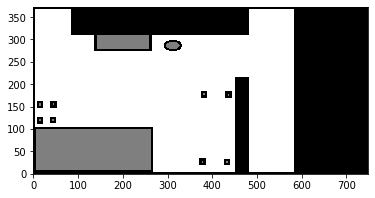

In [1249]:
#importar imagem
quarto = cv2.imread('quarto_completo.png',0)
#mostrar imagem
plt.imshow(quarto, cmap='gray', origin = 'lower')
#definir espaço permitido (área em branco)
espaco = quarto == 255
#printar dimensoes totais do quarto
espaco.shape

## agora vamos criar nossa partícula e movimentá-la no espaço

In [1250]:
p = Particula(150,100, espaco)

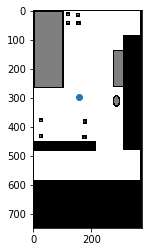

In [1258]:
#posição inicial da partícula
plt.imshow(quarto.T, cmap='gray')
plt.scatter(p.x,p.y)
#partícula se movimentando por 1000 intervalos de tempo
x = [] 
y = []
for i in range(1000):
    p.passo(espaco)
    x.append(p.x)
    y.append(p.y)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


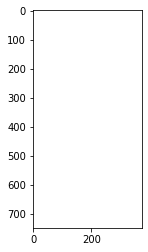

In [1259]:
#histórico de posições no tempo
fig, ax = plt.subplots()
camera = Camera(fig)
for x_,y_ in zip(x,y):
    plt.imshow(quarto.T, cmap='gray')
    plt.scatter(x_,y_, alpha = 1, s = 1, color = 'orange')
    camera.snap()
anim = camera.animate(blit=False, interval = 40)
anim.save('uma_particula.gif')

## Tudo certo para uma partícula! vamos agora simular diversas partículas no espaço

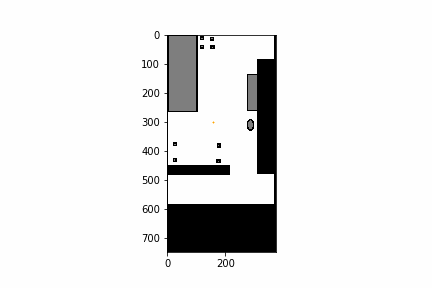

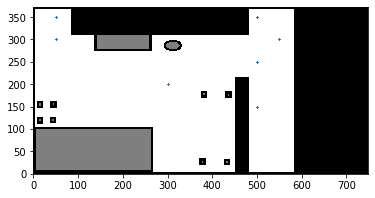

In [1286]:
esp = Espaco(quarto, espaco, 0.01, 10, [(200,300),(350, 50),(150,500),(350,500),(300,550),(250,500),(300,50)])
esp.mostrar_espaco_total(s = 0.1)

## o numero de particulas é tal que a densidade de particulas (numero de particulas/ área disponível) é igual 1%. Iremos observar o histórico de 10 partículas selecionadas aleatoriamente e as partículas serão amontoadas igualmente em cada um desses pontos azuis no quarto, banheiro e corredor.

## Vamos agora rodar nossa simulação por 10.000 espaços de tempo e tirar uma 'foto' do quarto a cada 50 periodos de tempo

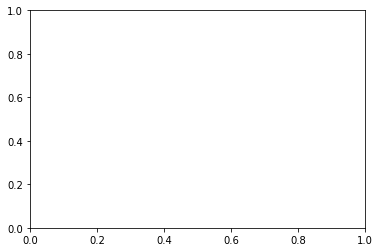

In [1287]:
fig, ax = plt.subplots()
camera = Camera(fig)
fotos = []
T = 100000
C = 50
c = 0
for i in tqdm(range(T)):
    esp.passo()
    c += 1
    if c == C:
        posicoes_x = [p.x for p in esp.particulas]
        posicoes_y = [p.y for p in esp.particulas]
        fotos.append([posicoes_x,posicoes_y])       
        c = 0

## Vamos ver agora o início e o fim da nossa simulação

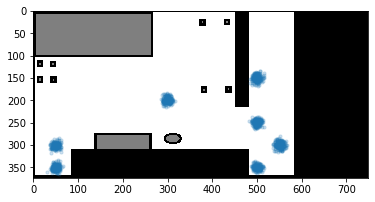

In [1293]:
plt.scatter(fotos[0][1],fotos[0][0],s = 10, alpha = 0.2)
plt.imshow(quarto, cmap = 'gray')

0.12742654279024096

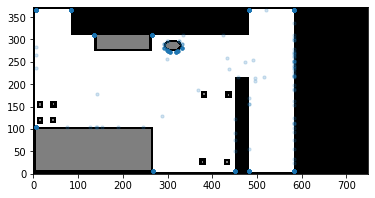

In [1294]:
esp.mostrar_espaco_total(s = 10, alpha = 0.2)
np.mean([i.gl for i in esp.particulas])

## Vamos agora observar a trajetória no tempo de uma das partículas observadas:

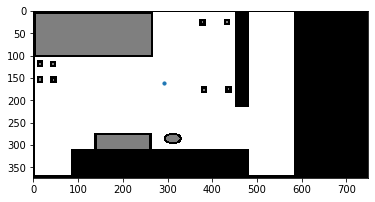

In [1300]:
#esp.mostrar_espaco_total(s = 0.4, alpha = 0.4)
plt.imshow(quarto, cmap = 'gray')
n = 4
plt.scatter(esp.observador[list(esp.observador)[n]]['y'], esp.observador[list(esp.observador)[n]]['x'], s = 1, alpha = 0.1)

## E a evolução dos seus graus de liberdade

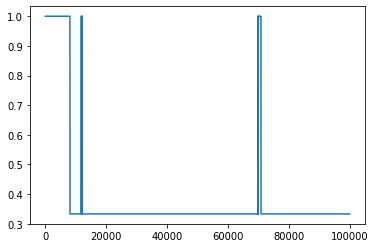

In [1296]:
plt.plot(range(len(esp.observador[list(esp.observador)[n]]['gl'])),esp.observador[list(esp.observador)[n]]['gl'], alpha = 1)

## Vamos agora gerar uma visualização dinâmica do nosso sistemainteiro

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


<Figure size 432x288 with 0 Axes>

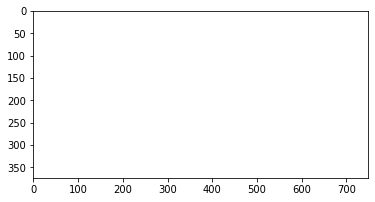

In [1297]:
from celluloid import Camera
plt.clf()
fig,ax = plt.subplots()
camera = Camera(fig)
n = 0
for i in tqdm(range(len(fotos))):
    try:
        plt.scatter(fotos[i][1],fotos[i][0],s = 5, alpha = 0.2, color = 'r')
        plt.imshow(quarto, cmap = 'gray')        
        camera.snap()        
        n+=1
    except: break

anim = camera.animate(blit=False, interval = 40)
anim.save('sim_visual.gif')